# Tensorflow Regression

Regression algorithm tries to find the function that best maps an input to an output in the simplest way, without overcomplicating things.
 * Input can be discrete or continuous, but the output is always continuous
 * Classification is for discrete outputs

How well is the algorithm working and how do we find the best function? We want a function that is not biased towards the training data it learned from and we don't want the results to wildly vary just because the real data is slightly different than the training set. We want it to generalize to unseen data as well.

**Variance** - indicates how sensitive a prediction is to the training set
 * low variance is desired because it shouldn't matter how we choose the training set
 * measures how badly the reponses vary

**Bias** - indicates the strength of the assumptions made on the training set
 * low bias is desired to prevent overfitting in order to make a more generalized model
 * measures how far off the the model is from the truth

**Cost Function** is used to evaluate each candidate solution
 * Higher cost means a worse solution, want the lowest cost
 * Tensorflow loops through all the data (an epoch) looking for the best possible value
 * Any cost function can be used, typically sum of squared errors:
  * the error difference between each data point and the chosen solution is squared (to penalize larger errors) and then added together to get a single "score" for that solution
  * the lowest score ends up being the best possible solution

## Linear Regression

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01                                 # Hyperparameters
training_epochs = 100

x_train = np.linspace(-1, 1, 101)                    # Dataset
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32)                       # tf placeholder nodes for input/output
Y = tf.placeholder(tf.float32)

w = tf.Variable(0.0, name="weights")                 # Weights variable

def model(X, w):                                     # defines model as Y = wX
    return tf.multiply(X, w)

y_model = model(X, w)                                # Cost Function
cost = tf.square(Y-y_model)

In [2]:
# Defines the operation to be called on each iteration of the learning algorithm
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()                                  # Setup the tf Session and init variables
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):                 # Loop thru dataset multiple times
    for (x, y) in zip(x_train, y_train):             # Loop thru each point in the dataset
        sess.run(train_op, feed_dict={X: x, Y: y})
        
w_val = sess.run(w)                                  # Get final parameter value

sess.close()                                         # Close the session

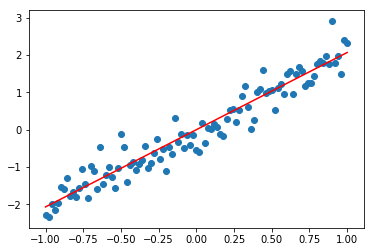

In [3]:
plt.scatter(x_train, y_train)                        # Plot the original data

y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')                    # Plot the best-fit line
plt.show()

## Polynomial Regression

When a simple linear function won't fit the data, a polynomial function offers more flexibility. An Nth degree polynomial: $f(x) = w_nx^n + ... + w_1x + w_0$ can also describe a linear function when $n=1$

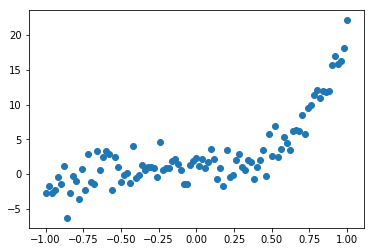

In [4]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01                                 # Hyperparameters
training_epochs = 40

trX = np.linspace(-1, 1, 101)                        # Dataset based on 5th deg polynomial
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.5             # Add noise

plt.scatter(trX, trY)
plt.show()

In [6]:
X = tf.placeholder(tf.float32)                       # tf placeholder nodes for input/output
Y = tf.placeholder(tf.float32)

w = tf.Variable(0.0, name="weights")                 # Weights variable

def model(X, w):                                     # defines model as 5th deg poly
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters") # Sets param vector to zeros
y_model = model(X, w)

cost = (tf.pow(Y-y_model, 2))                        # Cost Function

In [9]:
# Defines the operation to be called on each iteration of the learning algorithm
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()                                  # Setup the tf Session and init variables
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):                 # Loop thru dataset multiple times
    for (x, y) in zip(trX, trY):                     # Loop thru each point in the dataset
        sess.run(train_op, feed_dict={X: x, Y: y})
        
w_val = sess.run(w)                                  # Get final parameter value
print("5th deg polynomial coeffs:\n", w_val)

sess.close()                                         # Close the session

5th deg polynomial coeffs:
 [0.807839  0.9337213 4.204219  5.563588  3.5128243 5.4300046]


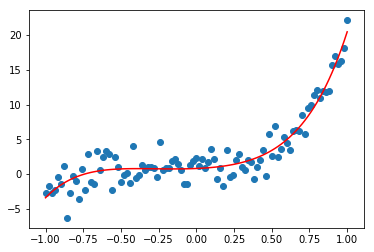

In [8]:
plt.scatter(trX, trY)                                # Plot the original data

trY2 = 0
for i in range(num_coeffs):                          # Plot the result
    trY2 += w_val[i] * np.power(trX, i)
    
plt.plot(trX, trY2, 'r')
plt.show()

## Regularization

Polynomial regression isn't always the best ... the goal should be to find the simplest function that best represents the data. A 10th degree polynomial isn't always the best answer. **Regularization** is a way of penalizing the wrong parameters in order to have the correct parameters be more dominant.

When the regularization parameter, $\lambda$, is zero there is no regularization taking place. Larger values of $\lambda$ penalize parameters with larger norms more; making an overly complicated model less complex and reducing its flexibility (fixes overfitting).